In [10]:
import torch
import cv2
from segment_anything import sam_model_registry, SamPredictor
from segment_anything import SamAutomaticMaskGenerator_mod as SamAutomaticMaskGenerator
import numpy as np
import torch
import functions as fnc
import gc
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt

In [2]:
OutDIR='/DATA/vito/output/foreground_background_noise_testing/'

In [11]:
OutDIR='/DATA/vito/output/colour_test_singleC_signedIOU/'

In [13]:
OutDIR='/DATA/vito/output/fg_bg_noise_withsignedIOU/'

In [17]:
try:
    test_outputs=np.load(OutDIR+'collect_test.npy', allow_pickle=True).tolist()
    print('record loaded')
except:
    test_outputs=[]
    print('No record found, created new list')

record loaded


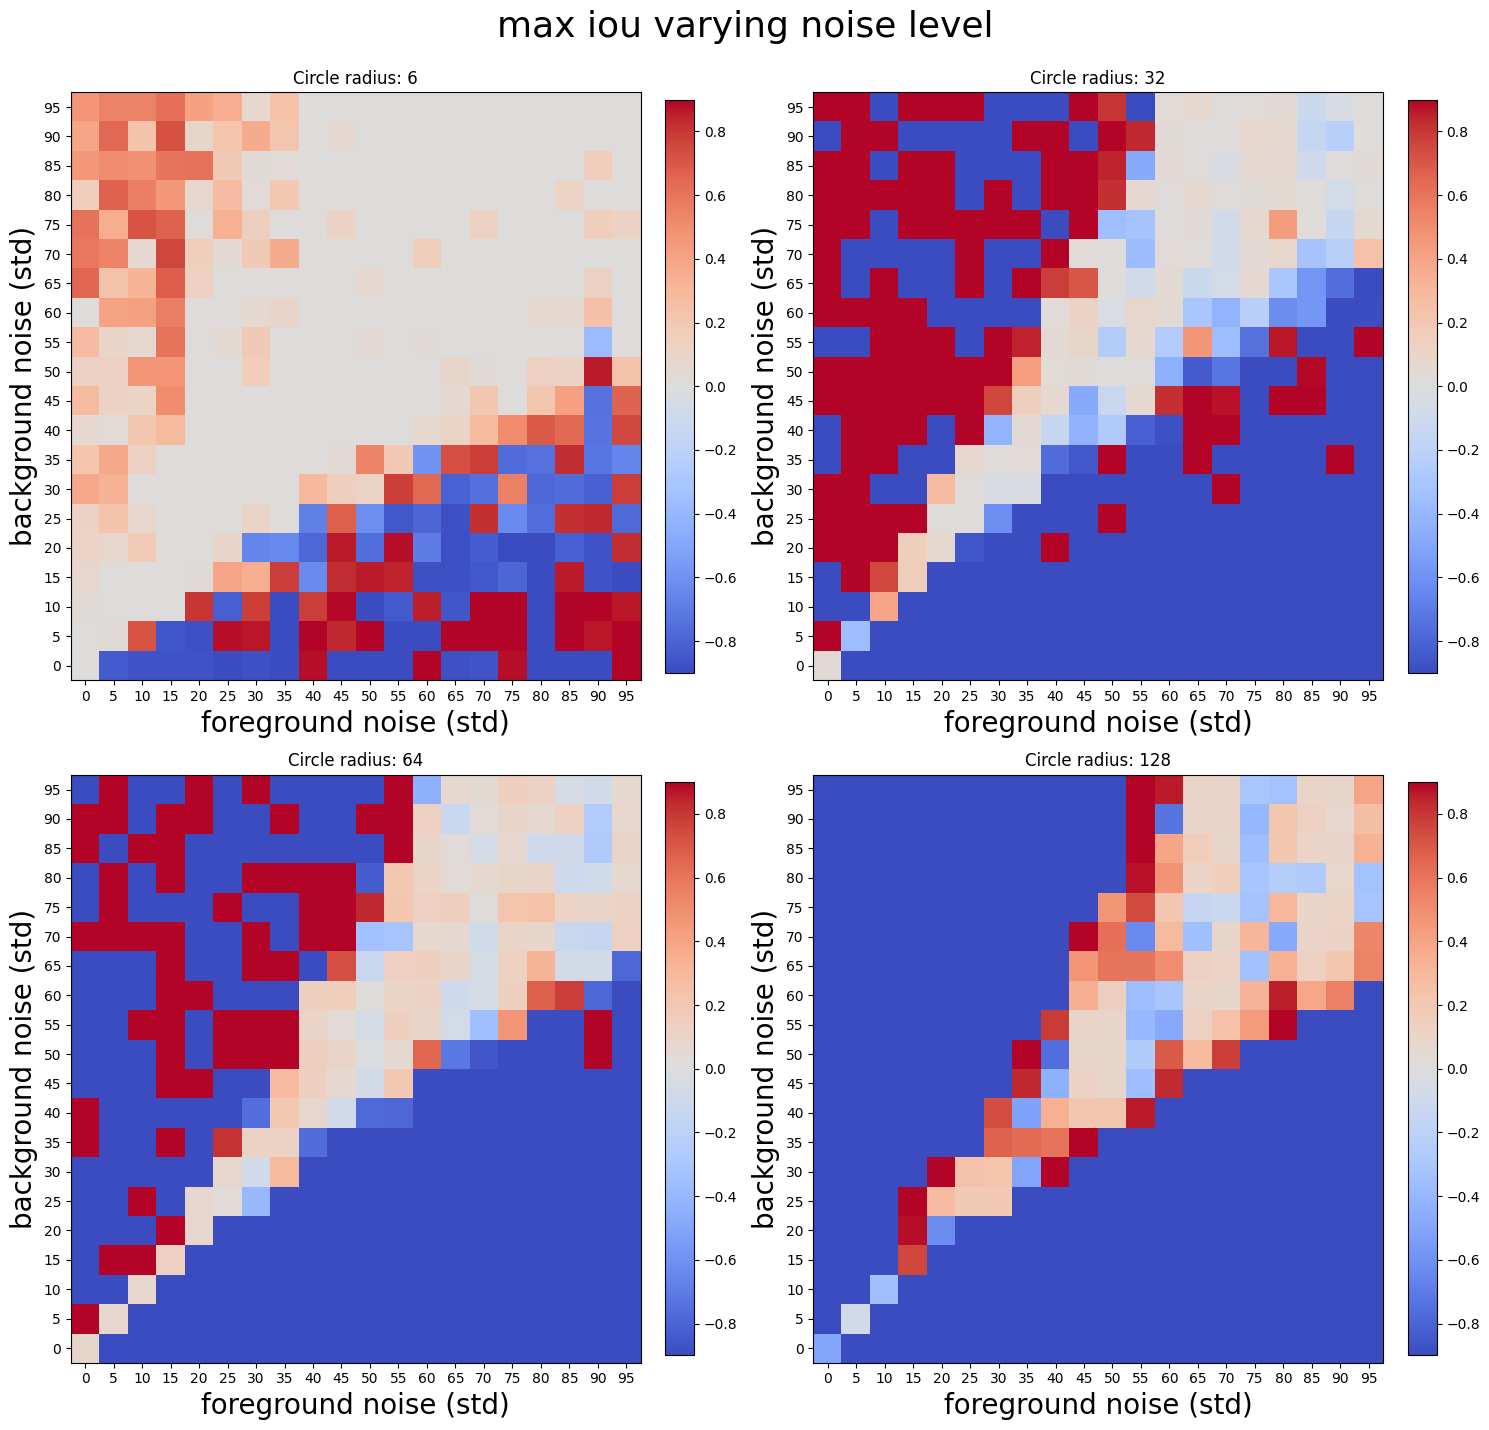

In [19]:
max_iou=[out['All_max_iou'] for out in test_outputs]

radi=[4,6,8,10]
radi=[6,32,64,128]
stds_all=np.arange(0,100,5)
std_edges=np.arange(0,100,5)

ticks=range(len(std_edges))
labels=(std_edges).astype(int)

plt.figure(figsize=(15, 15))
for i in range(4):#loop through radi
    #plt.figure(figsize=(15, 30))
    #for j in range(4):#loop through noise level
    col=i*4
    plt.subplot(2, 2, i+1)
    #plt.subplot(4, 4, i*4+j+1)
    plt.title(f'Circle radius: {radi[i]}')
    plt.imshow(np.vstack(
        np.hstack(
            [np.array([arg[:,col:col+4] for arg in max_iou[:20]])[:,0,:],
             np.array([arg[:,col:col+4] for arg in max_iou[20:40]])[:,0,:],
             np.array([arg[:,col:col+4] for arg in max_iou[40:60]])[:,0,:],
             np.array([arg[:,col:col+4] for arg in max_iou[60:80]])[:,0,:],
             np.array([arg[:,col:col+4] for arg in max_iou[80:]])[:,0,:]]
            )
        )
        , origin='lower', cmap='coolwarm'#, aspect='auto')
                , vmax=0.9,vmin=-0.9, aspect='auto')
    plt.yticks(ticks, labels)
    plt.ylabel('background noise (std)', fontsize=20)
    #plt.xticks(xticks, ['R','G','B'])
    plt.xticks(ticks, labels)
    plt.xlabel('foreground noise (std)', fontsize=20)
    plt.colorbar(fraction=0.046, pad=0.04)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle(f'max iou varying noise level', fontsize=26)
plt.savefig(OutDIR+f'max_iou.png') 
plt.show()

In [5]:
color_spacing=np.arange(0,1.1,0.05)
color_pair=np.array(np.meshgrid(color_spacing, color_spacing)).T.reshape(-1,2)
radi=[4,6,8,10]
stds=[0,10,25,40]

In [7]:
max_iou=[out['All_max_iou'] for out in test_outputs]
#nearest_iou=[out['All_nearest_iou'] for out in test_outputs]
#angular=np.array([out['angular_distance'] for out in test_outputs])
#euclidean=np.array([out['euclidean_distance'] for out in test_outputs])

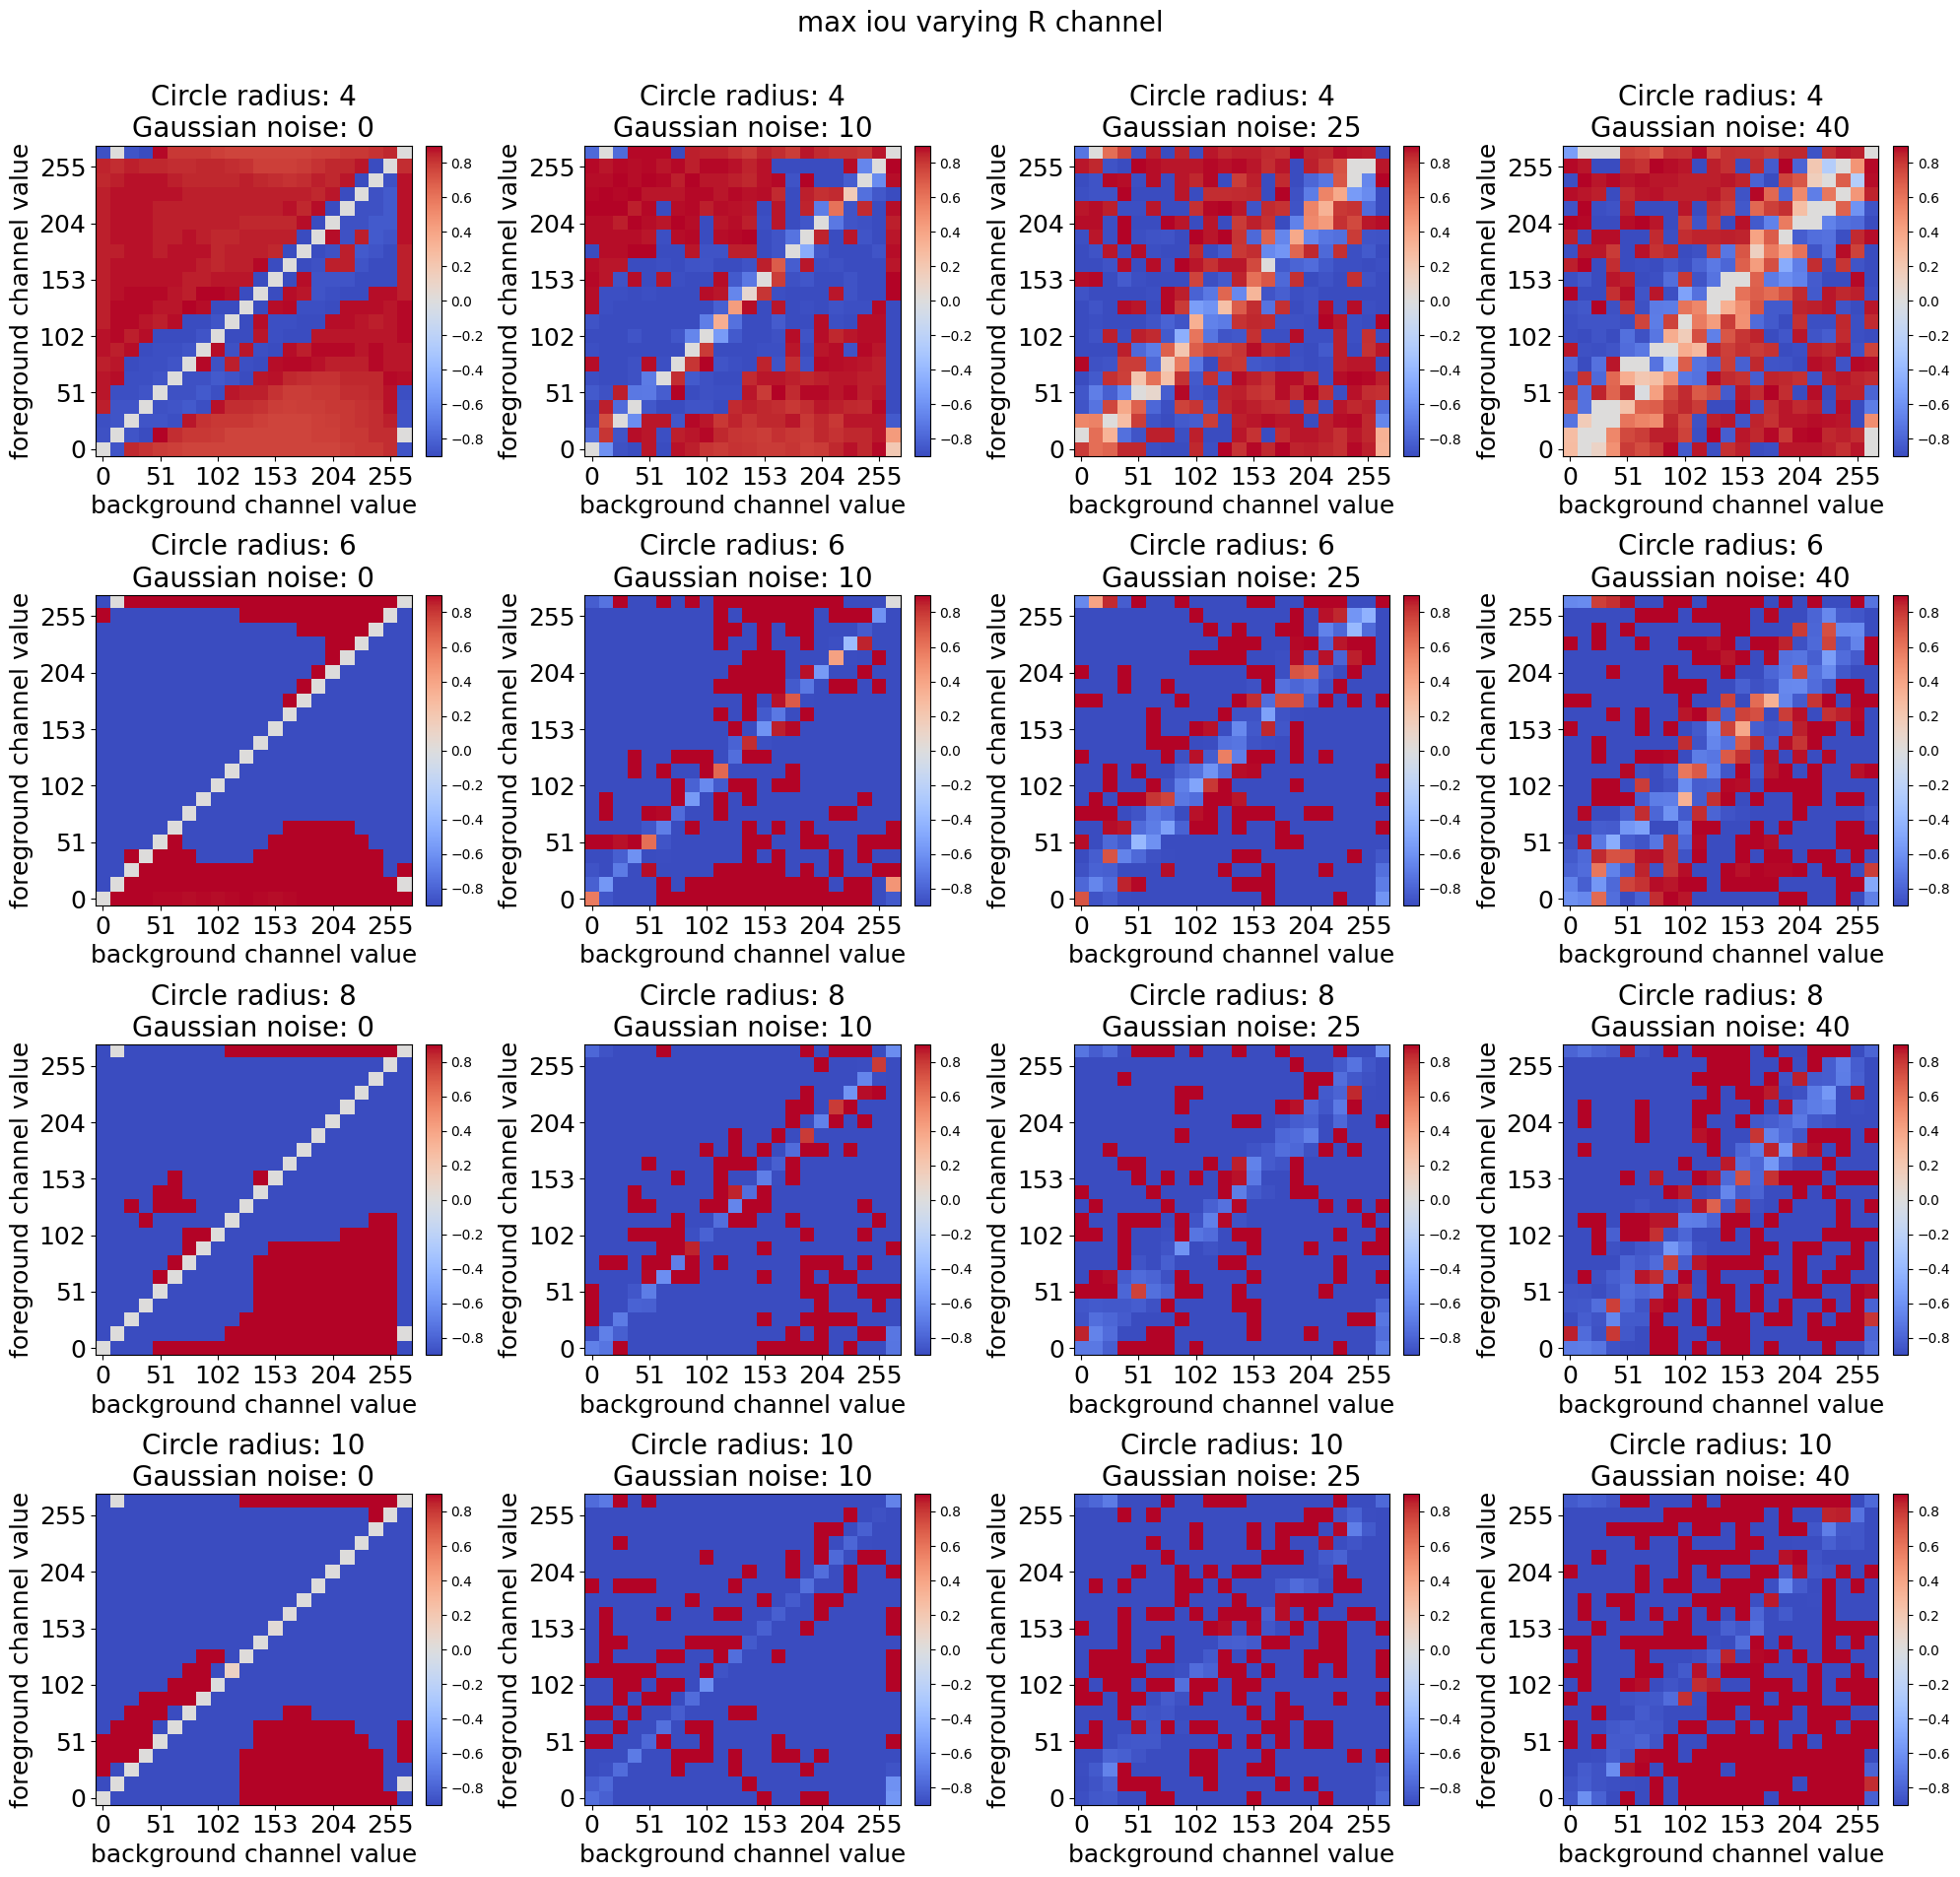

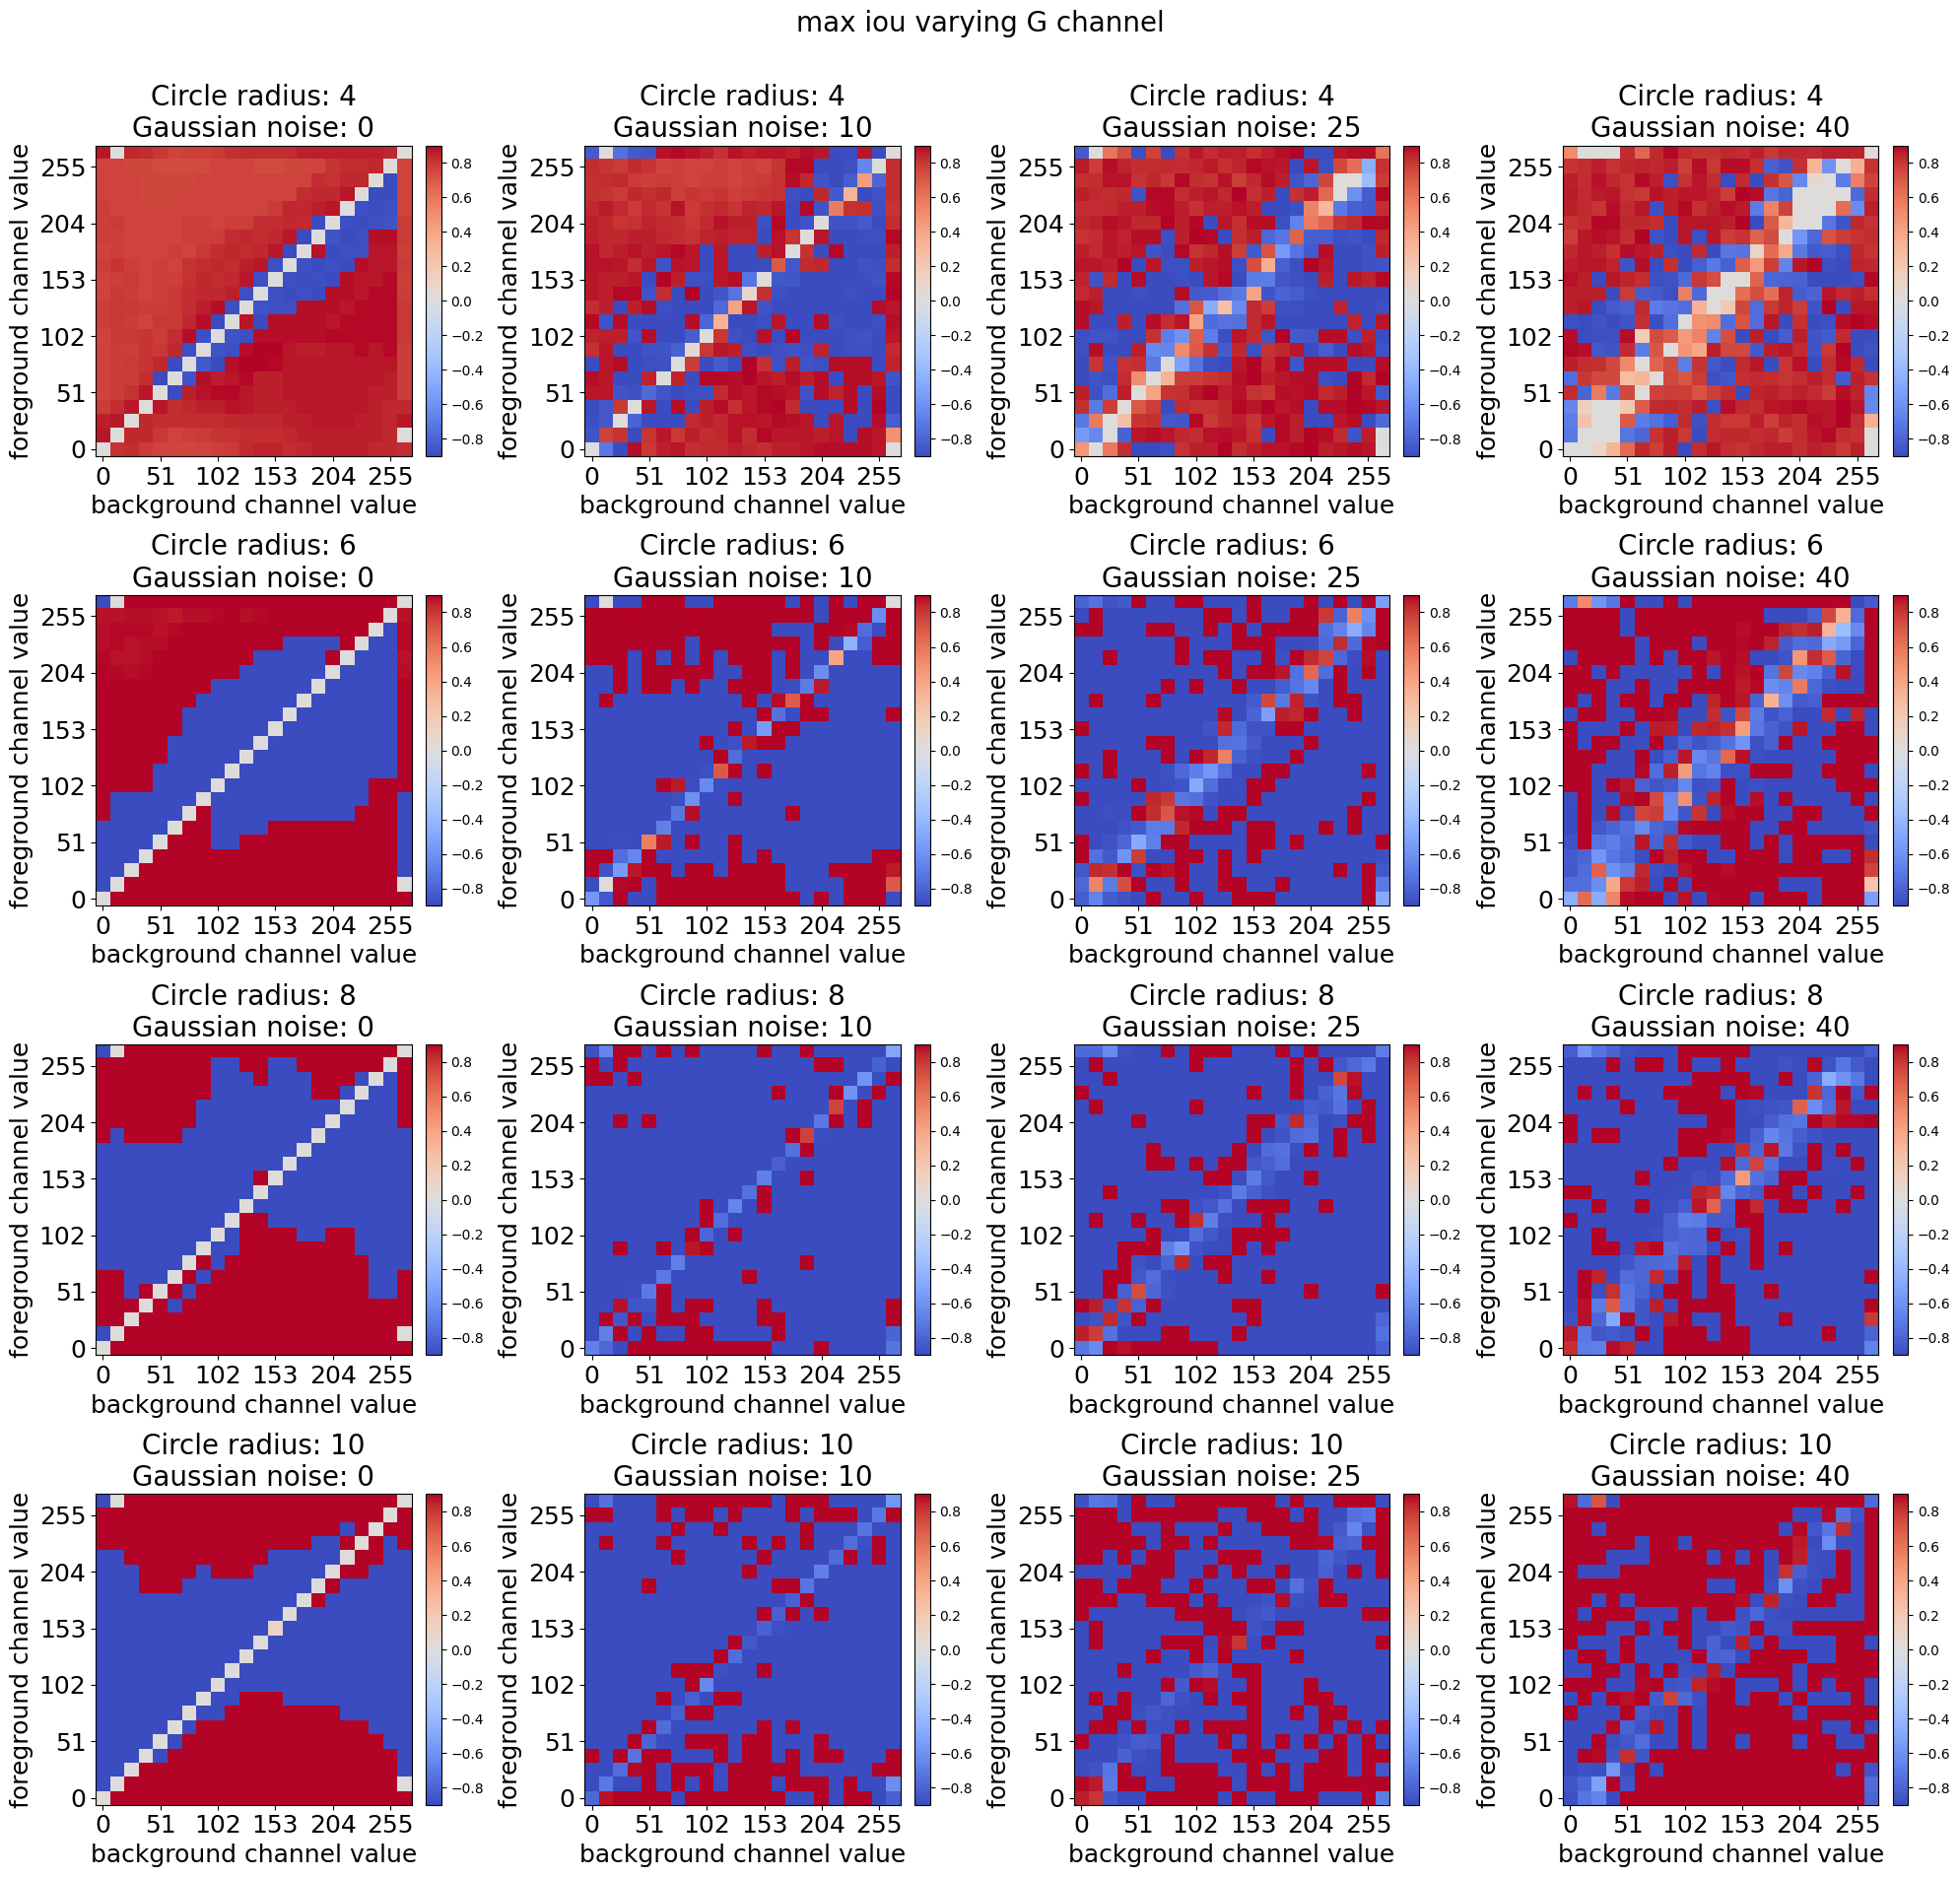

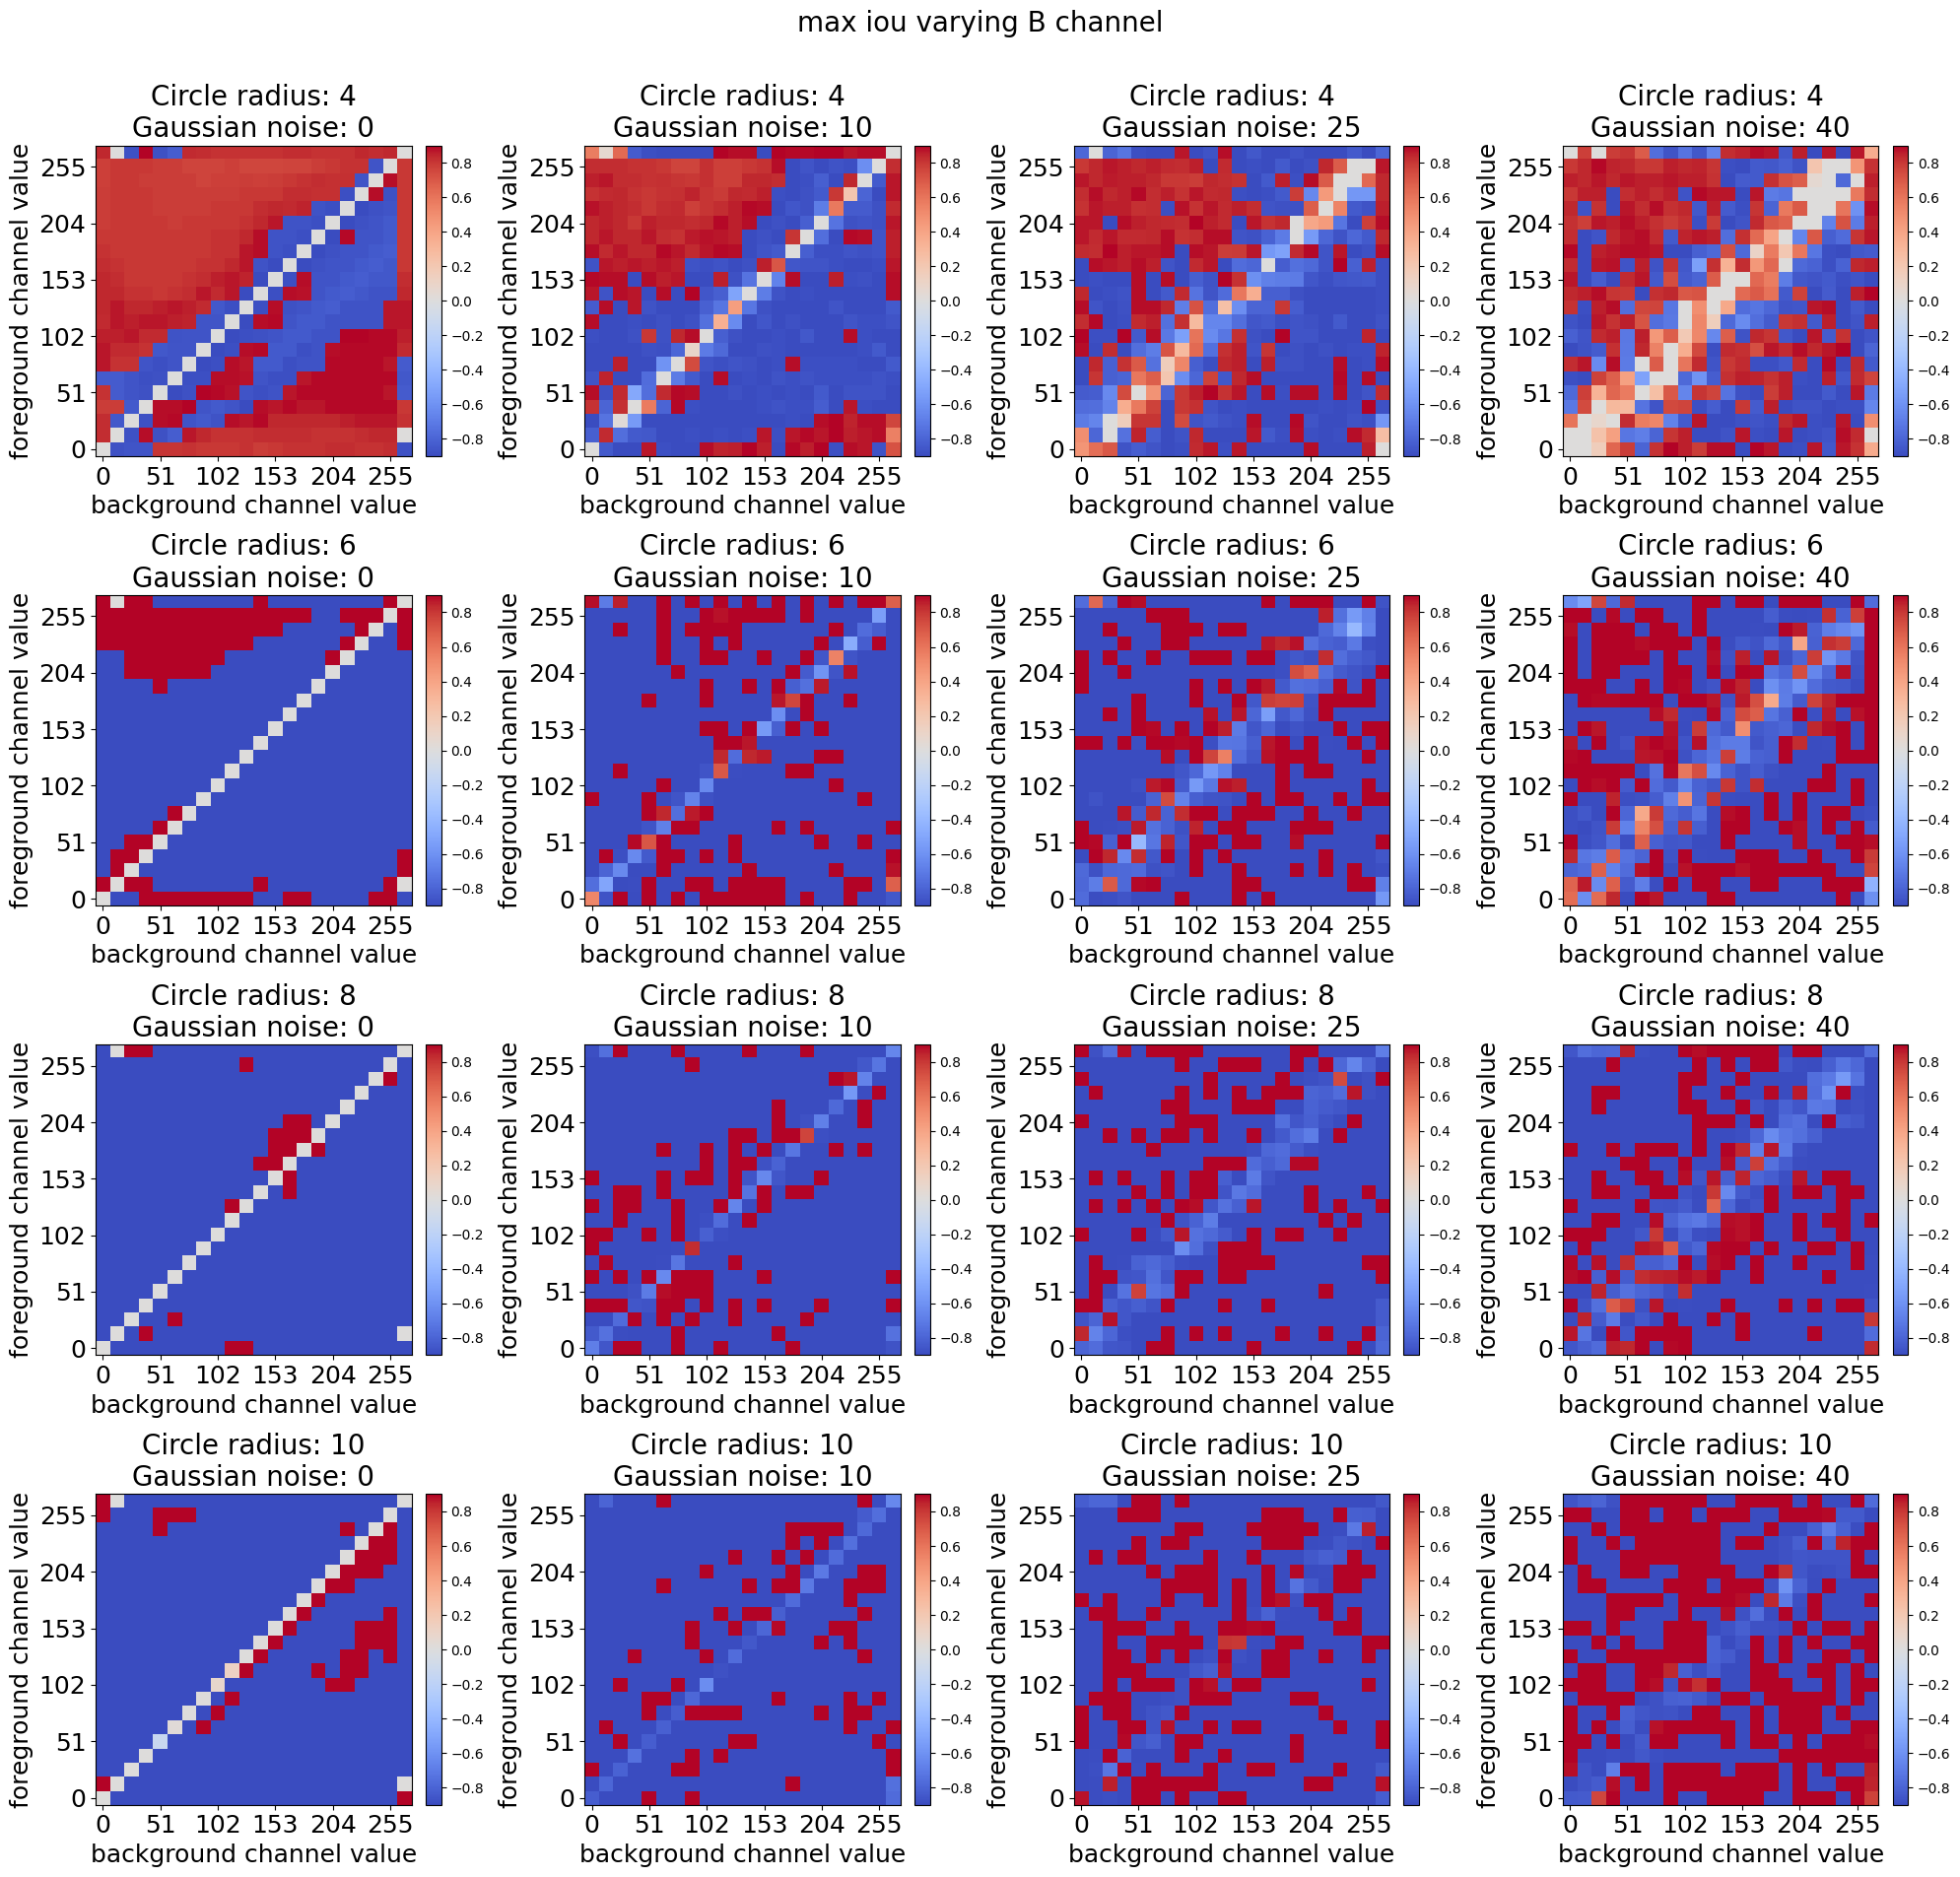

In [9]:
channel_s=['R','G','B']

for channel in range(3):
    ticks=range(len(color_spacing))[::4]
    labels=(color_spacing*255).astype(int)[::4]

    plt.figure(figsize=(20, 20))
    for i in range(4):#loop through radi
        #plt.figure(figsize=(15, 30))
        for j in range(4):#loop through noise level
            col=i*4+j
            #plt.subplot(1, 4, j+1)
            plt.subplot(4, 4, i*4+j+1)
            plt.title(f'Circle radius: {radi[i]}\nGaussian noise: {stds[j]}',fontsize=20)
            plt.imshow(np.vstack([arg[:,col][channel] for arg in max_iou]).reshape((len(color_spacing),len(color_spacing)))
                       , origin='lower', cmap='coolwarm'#, aspect='auto')
            #plt.imshow(np.vstack([arg[:,col][channel] for arg in max_iou]).reshape((11,11)), origin='lower'#, aspect='auto')
                        , vmax=0.9,vmin=-0.9, aspect='auto')
            plt.yticks(ticks, labels,fontsize=18)
            plt.ylabel('foreground channel value',fontsize=18)
            #plt.xticks(xticks, ['R','G','B'])
            plt.xticks(ticks, labels,fontsize=18)
            plt.xlabel('background channel value',fontsize=18)
            plt.colorbar(fraction=0.046, pad=0.04)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.suptitle(f'max iou varying {channel_s[channel]} channel', fontsize=20)
    plt.savefig(OutDIR+f'max_iou_{channel_s[channel]}.png') 
    plt.show()

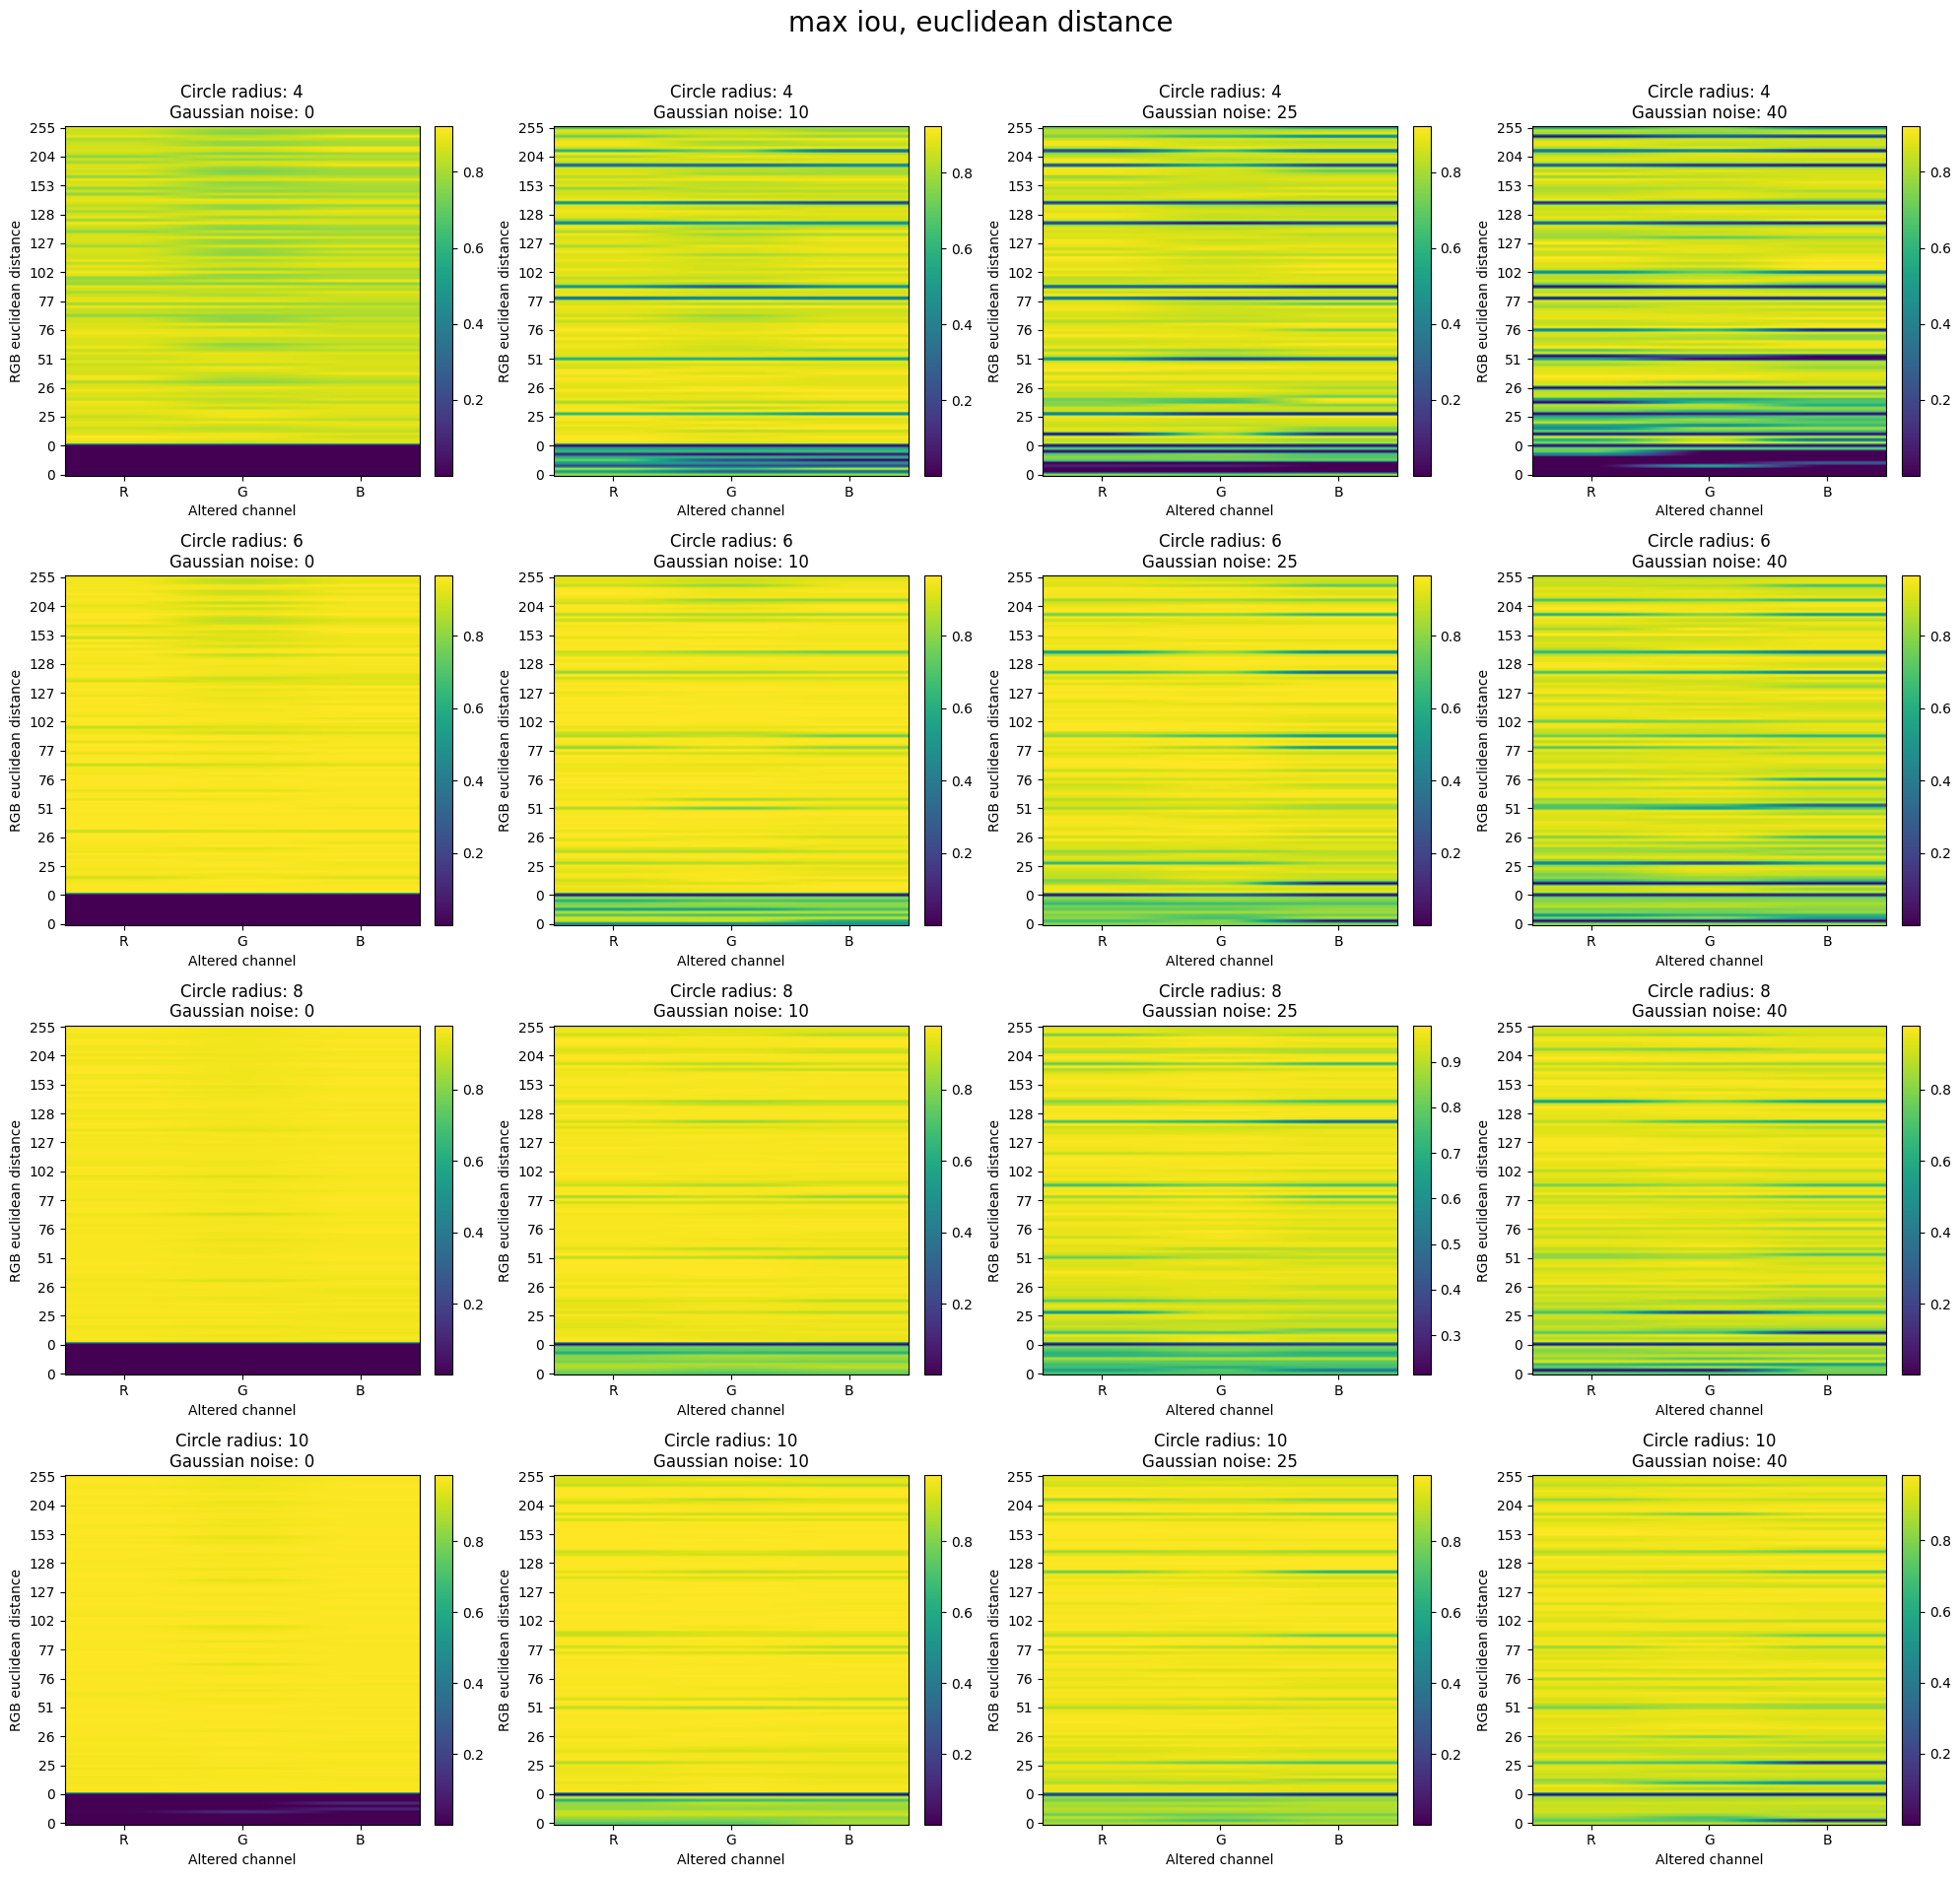

In [16]:
gn=[0,10,25,40]
radi=[4,6,8,10]
euclidean_sorted_id=np.argsort(euclidean)
yticks=np.arange(len(euclidean))
ylabels=np.round(np.sort(euclidean)).astype(int)
xticks=range(len(max_iou[0][:,1]))

plt.figure(figsize=(20, 20))
for i in range(4):#loop through radi
    #plt.figure(figsize=(15, 30))
    for j in range(4):#loop through noise level
        col=i*4+j
        #plt.subplot(1, 4, j+1)
        plt.subplot(4, 4, i*4+j+1)
        plt.title(f'Circle radius: {radi[i]}\nGaussian noise: {gn[j]}')
        plt.imshow(np.vstack([max_iou[arg][:,col] for arg in euclidean_sorted_id]), origin='lower', aspect='auto')
                    #, vmax=1,vmin=0.3, aspect='auto')
        plt.yticks(yticks[::10], ylabels[::10])
        plt.ylabel('RGB euclidean distance')
        plt.xticks(xticks, ['R','G','B'])
        plt.xlabel('Altered channel')
        plt.colorbar(fraction=0.046, pad=0.04)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('max iou, euclidean distance', fontsize=20)
plt.show()

/tmp/ipykernel_18305/3096042300.py:5: RuntimeWarning: invalid value encountered in cast
  ylabels=np.round(np.sort(angular)).astype(int)


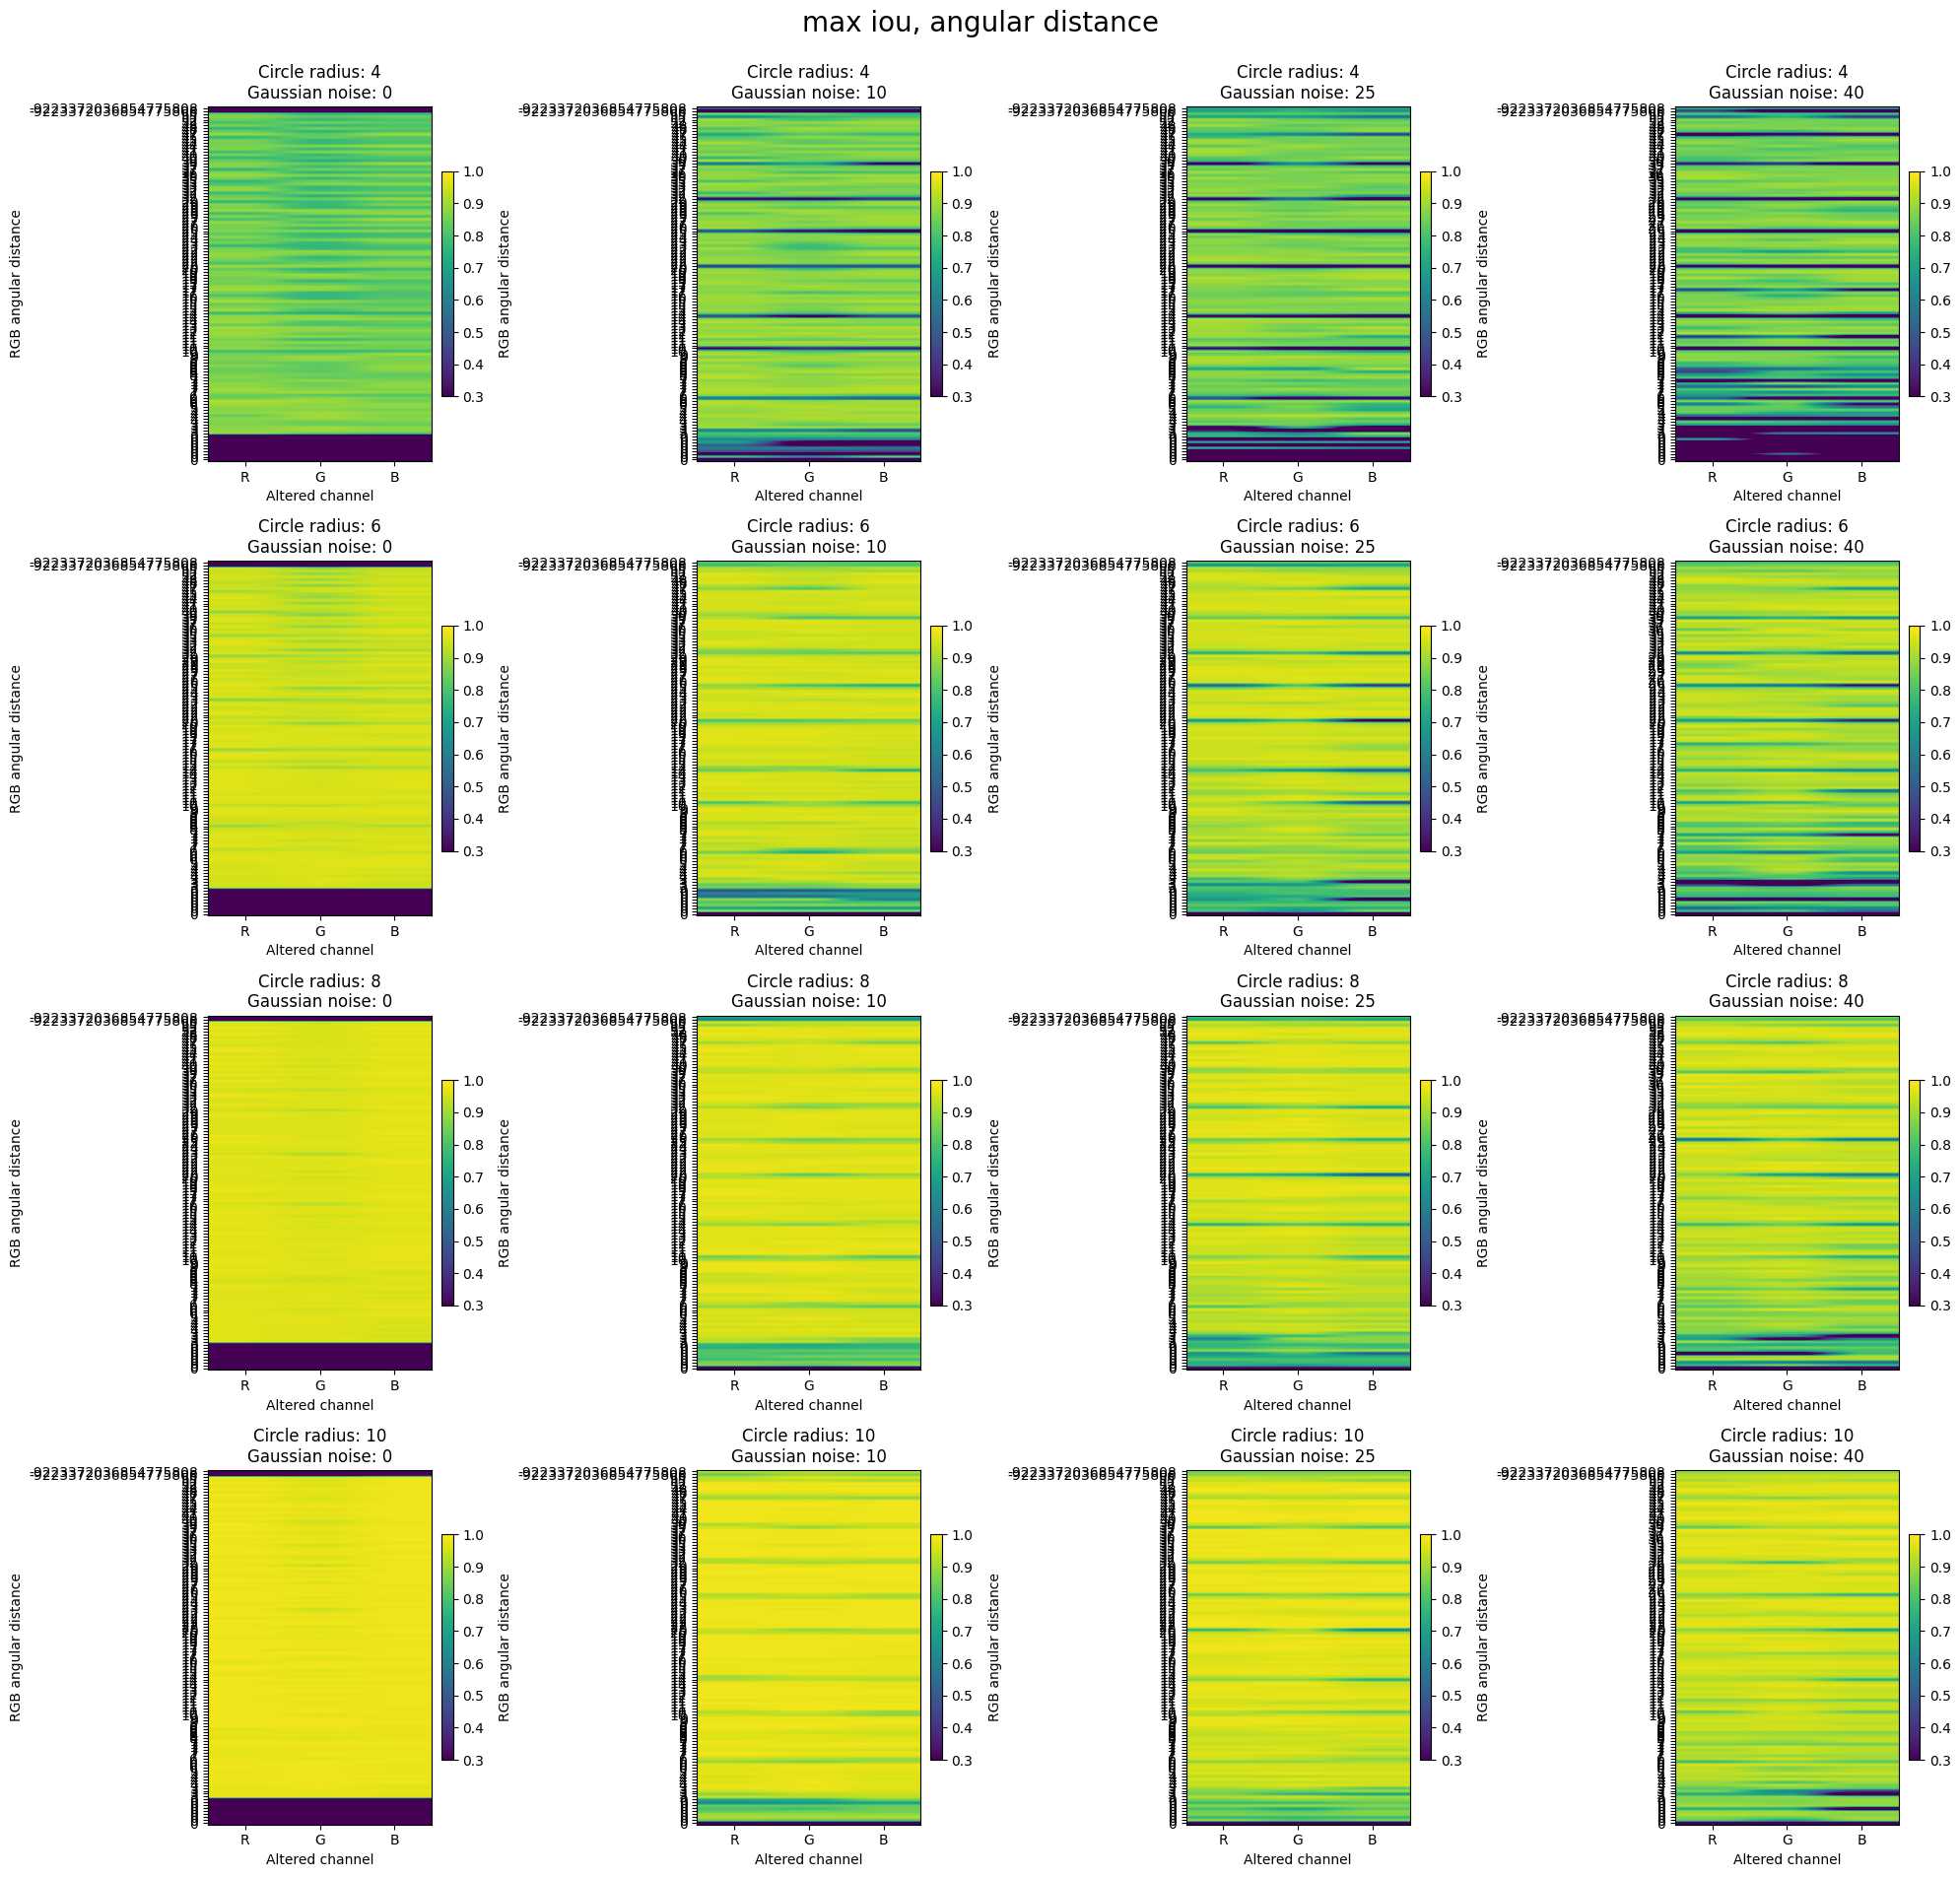

In [19]:
gn=[0,10,25,40]
radi=[4,6,8,10]
angular_sorted_id=np.argsort(angular)
yticks=np.arange(len(angular))
ylabels=np.round(np.sort(angular)).astype(int)
xticks=range(len(max_iou[0][:,1]))

plt.figure(figsize=(20, 20))
for i in range(4):#loop through radi
    
    for j in range(4):#loop through noise level
        col=i*4+j
        plt.subplot(4, 4, i*4+j+1)
        plt.title(f'Circle radius: {radi[i]}\nGaussian noise: {gn[j]}')
        plt.imshow(np.vstack([max_iou[arg][:,col] for arg in angular_sorted_id]), origin='lower', 
                   vmax=1,vmin=0.3, aspect='auto')
        plt.yticks(yticks, ylabels)
        plt.ylabel('RGB angular distance')
        plt.xticks(xticks,  ['R','G','B'])
        plt.xlabel('Altered channel')
        plt.colorbar(fraction=0.046, pad=0.04)


plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.suptitle('max iou, angular distance', fontsize=20)
plt.show()

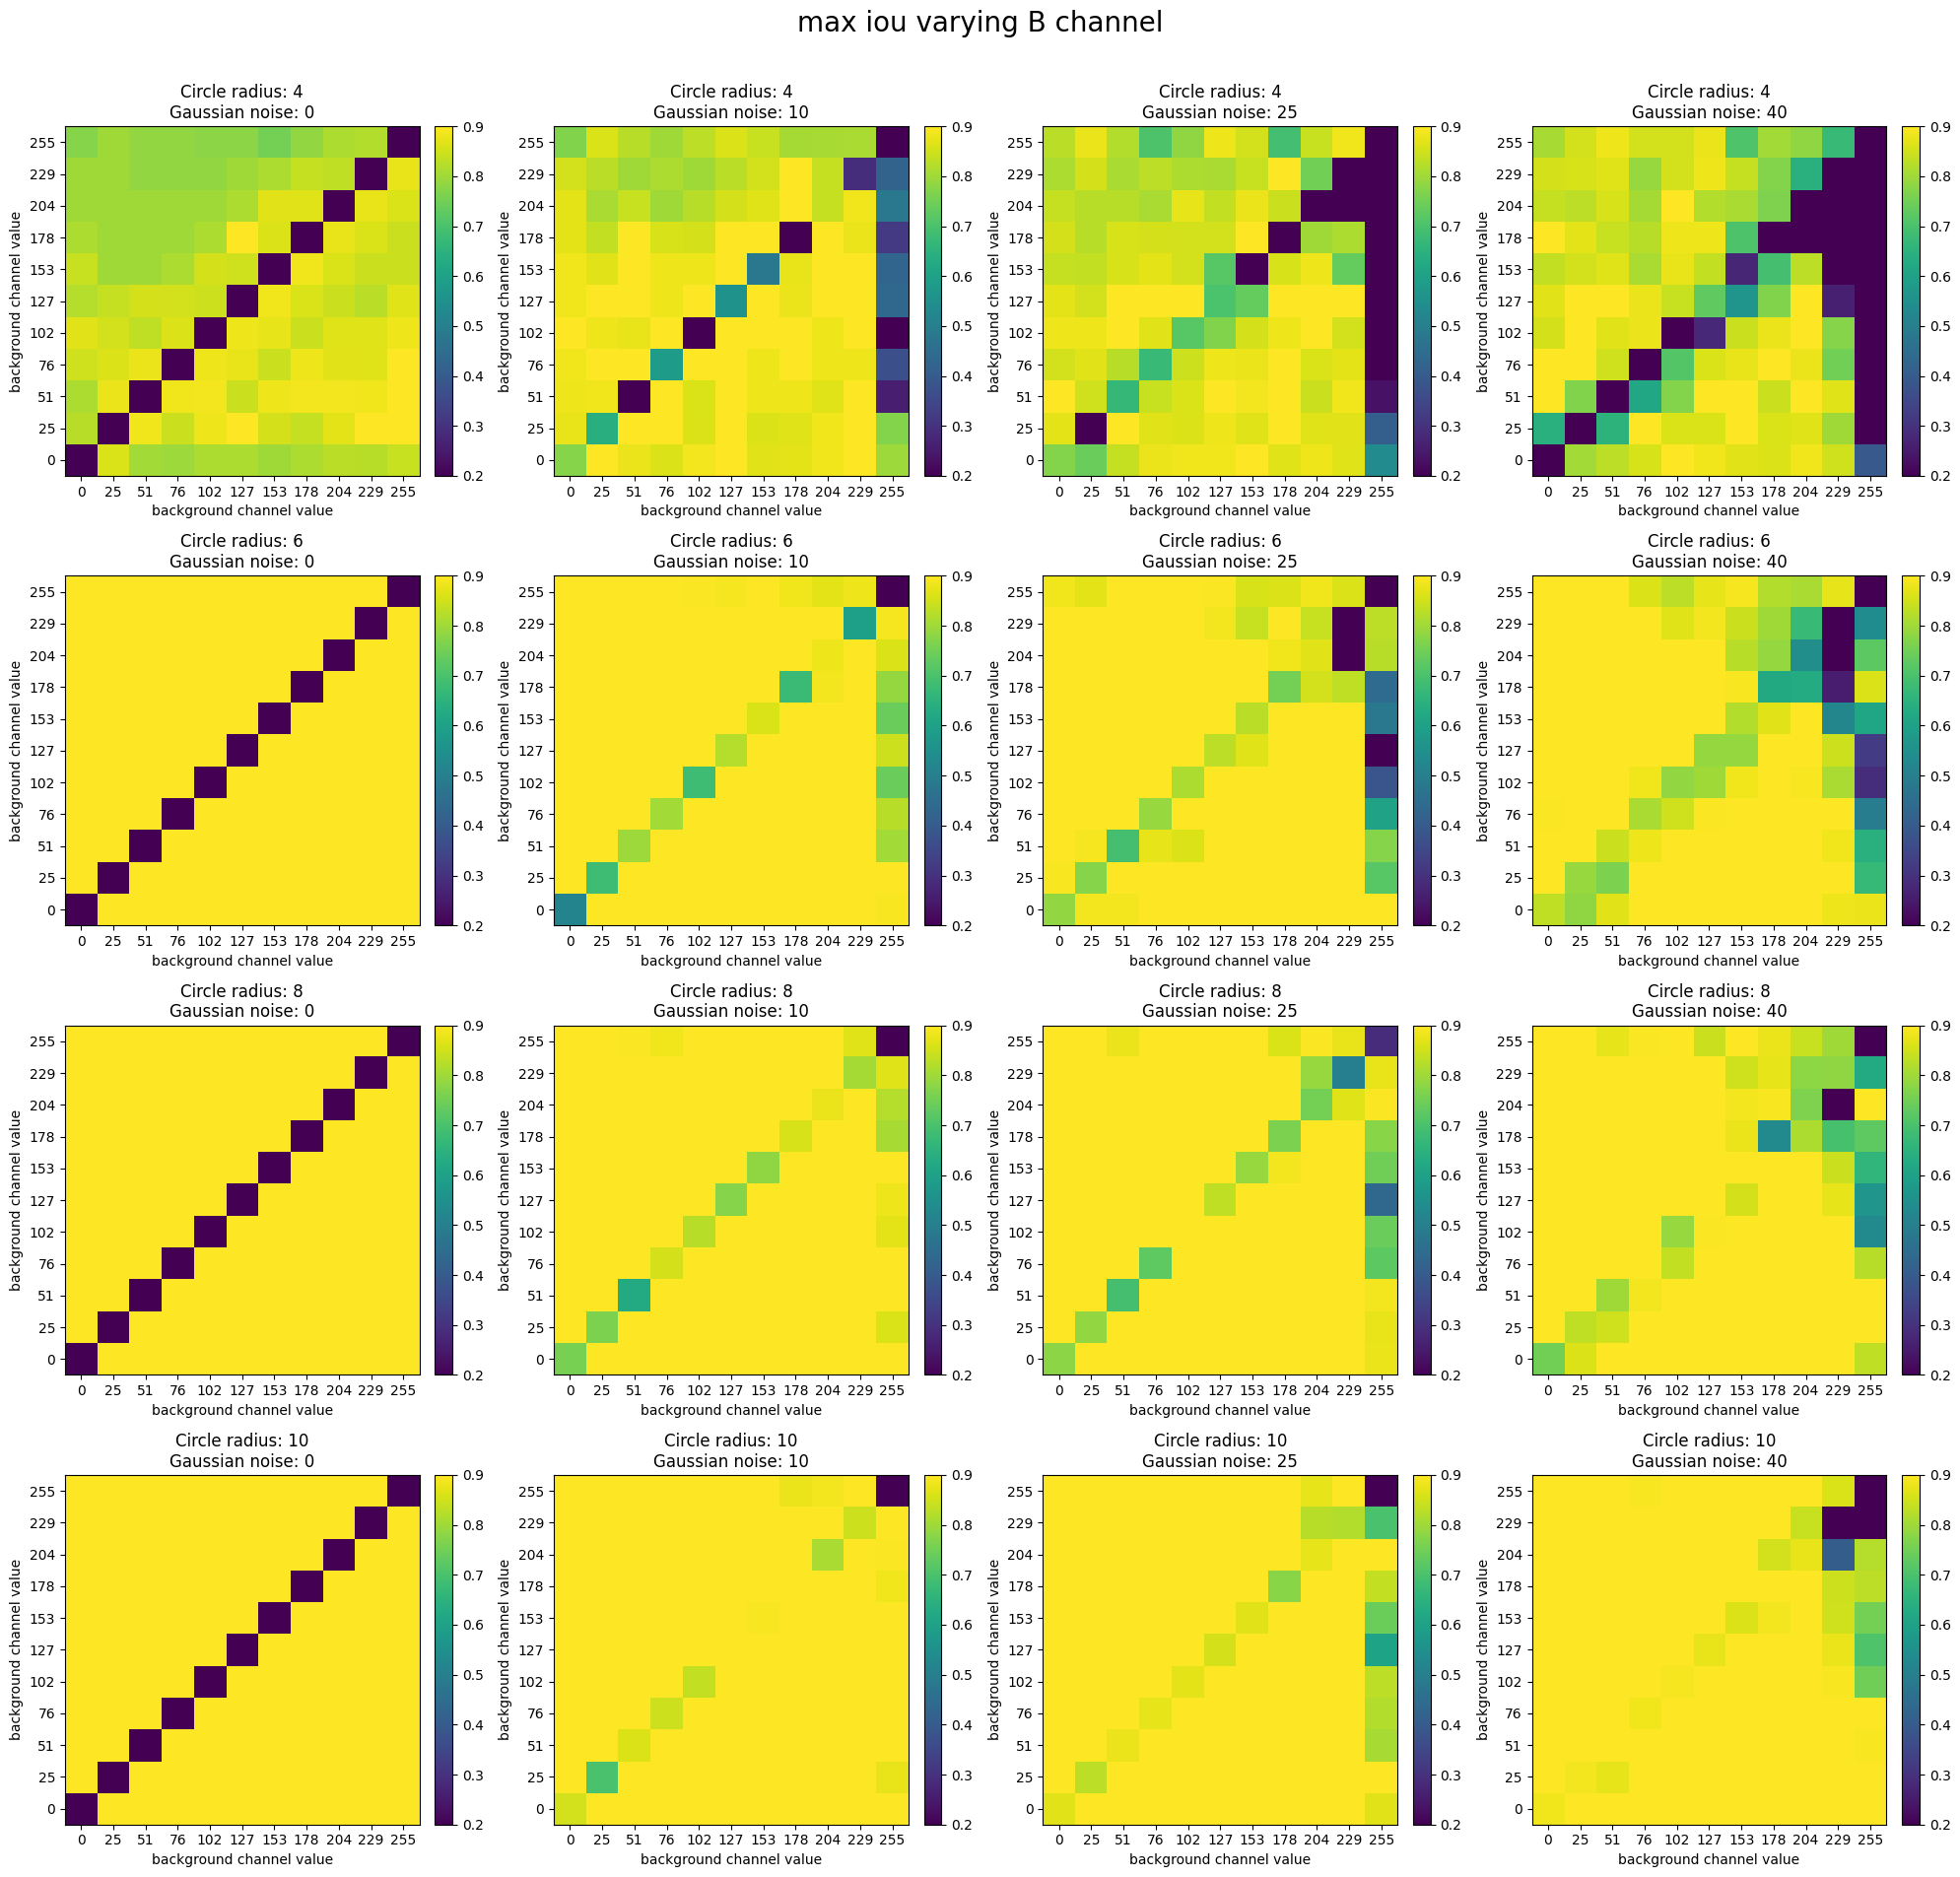

In [34]:
channel=2
channel_s=['R','G','B']
gn=[0,10,25,40]
radi=[4,6,8,10]
yticks=range(11)
ylabels=(np.arange(0,1.1,0.1)*255).astype(int)
xticks=range(11)
xlabels=(np.arange(0,1.1,0.1)*255).astype(int)

plt.figure(figsize=(20, 20))
for i in range(4):#loop through radi
    #plt.figure(figsize=(15, 30))
    for j in range(4):#loop through noise level
        col=i*4+j
        #plt.subplot(1, 4, j+1)
        plt.subplot(4, 4, i*4+j+1)
        plt.title(f'Circle radius: {radi[i]}\nGaussian noise: {gn[j]}')
        plt.imshow(np.vstack([arg[:,col][channel] for arg in max_iou]).reshape((11,11)), origin='lower'#, aspect='auto')
                    , vmax=0.9,vmin=0.2, aspect='auto')
        plt.yticks(yticks, ylabels)
        plt.ylabel('background channel value')
        #plt.xticks(xticks, ['R','G','B'])
        plt.xticks(xticks, xlabels)
        plt.xlabel('background channel value')
        plt.colorbar(fraction=0.046, pad=0.04)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle(f'max iou varying {channel_s[channel]} channel', fontsize=20)
plt.show()

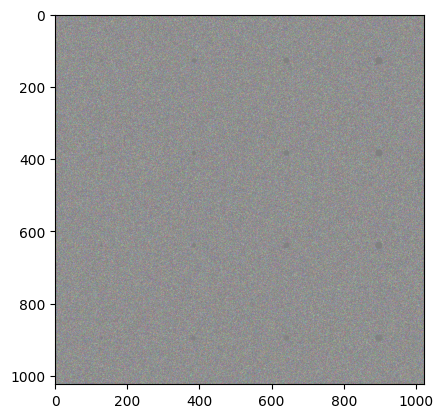

In [4]:
radi=[4,6,8,10]
stds=np.arange(0,20,5)
std_edges=np.arange(0,100,5)

inner=True#
#inner=False
var=True#
#var=False

#create image and noise
all_col=[]
all_col_mask=[]
label=1
for r in radi:
    temp_row=[]
    temp_row_mask=[]
    for std in stds:
        mask=fnc.make_circle(r)
        rgb_sphere=np.zeros((256,256,3))#fnc.circle_colouring(mask)
        if inner:
            if var:
                edge=std_edges[10]
                noisy_image=fnc.add_guassian_noise_to_circle(rgb_sphere,0,std,mask,edge)
            else:
                noisy_image=fnc.add_guassian_noise_to_circle(rgb_sphere,0,std,mask)
        else:
            noisy_image=fnc.add_guassian_noise_to_circle(rgb_sphere,0,std)
        temp_row.append(noisy_image)
        temp_row_mask.append((mask).astype(int)*label)
        label+=1
    all_col.append(np.vstack(temp_row))
    all_col_mask.append(np.vstack(temp_row_mask))
noise_layer=np.hstack(all_col)
all_mask=np.hstack(all_col_mask)

All_nearest_iou=[]
All_max_iou=[]

#for channel in range(3):
RGB=[128,128,128]
RGB_edge=[128,128,128]
#RGB[channel]=int(color_pair[run][0]*255)
#RGB_edge[channel]=int(color_pair[run][1]*255)
image=fnc.circle_colouring_specified(all_mask!=0, RGB, RGB_edge)
#clipping the noise by the half of the smaller std
clipping=np.min([std,edge])
noise_layer=np.clip(noise_layer,-clipping/2, np.max(noise_layer))

image=image+noise_layer
image=np.clip(image, 0, 255).astype(np.uint8)

plt.imshow(image)
